In [1]:
import sys

In [2]:
sys.path.append("../")

In [3]:
from dgs.denotation_graph import DenotationGraph, visualize_denotation_graph, find_similar_nodes

In [5]:
dg = DenotationGraph(graph_folder_path="../../../flicker30k_denotation_graph/flicker30k/graph")

ℹ Reading node.idx file
ℹ Reading node-cap.map file
ℹ Reading node-img.map file
ℹ Reading the node-tree.txt file


Finding leaf nodes...: 100%|██████████| 2642009/2642009 [00:08<00:00, 299665.93it/s]


In [6]:
len(dg.leaf_nodes)

621175

In [7]:
len(dg.nodes)

2642009

In [8]:
len(dg.edges)

7986054

In [9]:
query = "man wear red hat"

In [10]:
# increasing the batch size and n_process seems to produce worse results atleast in my laptop.
# Maybe because, spawning a new process might take more time than the processing.
matches= find_similar_nodes(graph=dg, query=query, threshold=0.8, batch_size=100, n_process=1)

ℹ Loading en_core_web_lg model in spacy


Finding similar nodes:   0%|          | 401/2642009 [00:00<22:11, 1984.01it/s]../dgs/denotation_graph.py:210: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  s = query.similarity(t)
Finding similar nodes: 100%|██████████| 2642009/2642009 [12:46<00:00, 3447.90it/s]


In [11]:
def get_immediate_in_out_edges(node_idx, graph):
    edges = graph.get_in_edges(node_idx)
    edges.extend(graph.get_out_edges(node_idx))
    return edges

In [16]:
# First 10 matches
matches[:10]

[(9612, 'man wear red hat', 1.0),
 (8640, 'man wear blue hat', 0.9836953460622913),
 (714517, 'man wear hat standing wear red hat', 0.9815399763305239),
 (21707, 'man wear yellow hat', 0.9812336362362793),
 (2020408, 'some man wear red hat', 0.9802779603932521),
 (352317, 'man wear purple hat', 0.9799007404757172),
 (622835, 'black man wear red hat', 0.979106219027621),
 (1888775, 'man wear red hat standing', 0.9772336266930292),
 (714438, 'man standing wear red hat', 0.9772336261597312),
 (8944, 'man wear orange hat', 0.9766922086719966)]

In [12]:
edges = get_immediate_in_out_edges(matches[0][0], dg)

In [13]:
len(edges)

132

In [14]:
subgraph = dg.get_subgraph_from_edges(edges[:20]) # visualize the first 20 edges

Finding leaf nodes...: 100%|██████████| 21/21 [00:00<00:00, 5713.57it/s]


In [15]:
visualize_denotation_graph(subgraph, "./search_subgraph.png")

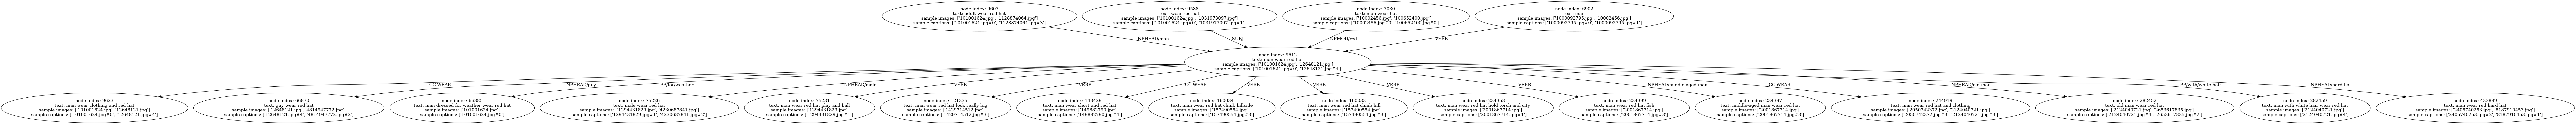

In [18]:
from IPython import display
display.Image(filename="./search_subgraph.png")